In [1]:
import state_utils

state_utils.set_cohort("Poyet")
state_utils.set_host("ao")
state_utils.set_midas_db_type("standard")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config
import os
import figure_utils as fu
letter_list = ["A","B","C"]

In [2]:
analysis_dir = config.analysis_directory

all_species = os.listdir("%s/clusters/Poyet/%s" % (analysis_dir,config.host))

strain_centroid_dic = {}

for species in all_species:
    
    cluster_dir = "%s/clusters/Poyet/%s/%s" % (analysis_dir,config.host,species)

    strain_snv_dic = {}
    #strain_centroid_dic = {}
    i = 0

    for strain in os.listdir(cluster_dir):
        
        strain_label = "%s_%s" % (species,letter_list[i])
        df = pd.read_csv("%s/%s" % (cluster_dir,strain),index_col=0)
        strain_snv_dic[strain_label] = df
        strain_centroid_dic[strain_label] = df.median()
        
        print(strain_centroid_dic[strain_label].min() == 1)
        
        i+=1
        
    if len(os.listdir(cluster_dir)) == 1 and strain_centroid_dic["%s_%s" % (species,letter_list[0])].min() != 1.0:
        strain_centroid_dic["%s_%s" % (species,letter_list[1])] = 1 - strain_centroid_dic["%s_%s" % (species,letter_list[0])]

strain_centroid_dic = pd.DataFrame(strain_centroid_dic)


True
True
True
True
True
True
True
False
False
False
True


In [3]:
strain_centroid_dic = strain_centroid_dic.T

In [4]:
import seaborn as sns

In [5]:
strain_centroid_dic.index.name = "strain"
strain_centroid_dic.columns.name = "samples"

In [6]:
strain_centroid_dic = strain_centroid_dic.T

In [7]:
strain_centroid_dic = strain_centroid_dic.loc[:,strain_centroid_dic.mean() != 1]
strain_centroid_dic.columns = [fu.get_pretty_species_name(s[:-2]) for s in strain_centroid_dic.columns]

In [8]:
strain_centroid_dic = strain_centroid_dic.loc[config.dates.index]

/u/home/r/rwolff/.conda/envs/strain_stability_env/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [9]:
strain_centroid_dic.max() - strain_centroid_dic.min() 

Bacteroides ovatus                      0.119413
Bacteroides ovatus                      0.119413
Bacteroides xylanisolvens               0.219230
Bacteroides xylanisolvens               0.219230
Faecalibacterium prausnitzii (61481)    0.881793
Faecalibacterium prausnitzii (61481)    0.881793
dtype: float64

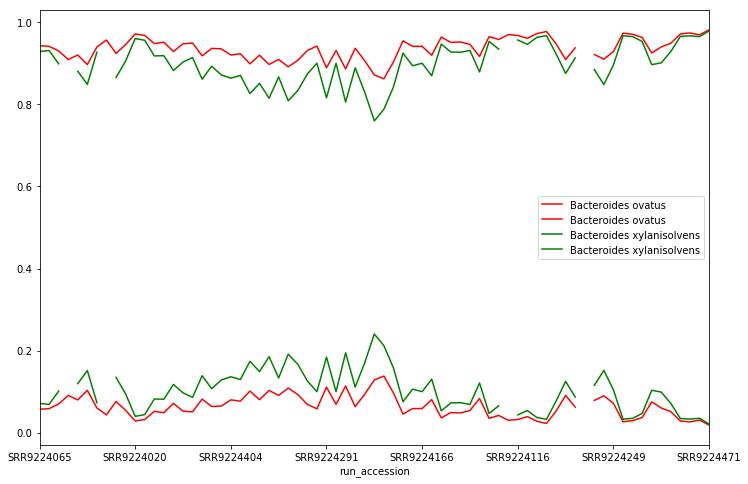

In [10]:
fig,ax = plt.subplots(figsize=(12,8))
strain_centroid_dic["Bacteroides ovatus"].plot(color="red",ax=ax)
strain_centroid_dic["Bacteroides xylanisolvens"].plot(color="green",ax=ax)

In [ ]:
for species in strain_centroid_dic.columns:
    sns.violinplot(data=strain_centroid_dic[species])

In [ ]:
12.0/46